<a href="https://colab.research.google.com/github/themukeshsingh01/Blinkit-Analysis-Project/blob/main/Blinkit_Analysis_in_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DATA ANALYSIS PYTHON PROJECT - BLINKIT ANALYSIS**

**Importing Libraries**

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset


In [43]:
df = pd.read_csv("/content/BlinkIT Grocery Data.csv")
df.head()

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Total Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2010,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2000,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0


#Checking The Dataset

In [44]:
df['Item Fat Content'].unique()

array(['Regular', 'Low Fat', 'low fat', 'LF', 'reg'], dtype=object)

In [45]:
df.shape

(8523, 12)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item Fat Content           8523 non-null   object 
 1   Item Identifier            8523 non-null   object 
 2   Item Type                  8523 non-null   object 
 3   Outlet Establishment Year  8523 non-null   int64  
 4   Outlet Identifier          8523 non-null   object 
 5   Outlet Location Type       8523 non-null   object 
 6   Outlet Size                8523 non-null   object 
 7   Outlet Type                8523 non-null   object 
 8   Item Visibility            8523 non-null   float64
 9   Item Weight                7060 non-null   float64
 10  Total Sales                8523 non-null   float64
 11  Rating                     8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


As we can see **item weight** contains some **null values** but there is no use of item weight in our analysis so we would remove that column

In [47]:
df.describe()

,Outlet Establishment Year,Item Visibility,Item Weight,Total Sales,Rating
count,8523.000000,8523.000000,7060.000000,8523.000000,8523.000000
mean,2010.831867,0.066132,12.857645,140.992782,3.965857
std,8.371760,0.051598,4.643456,62.275067,0.605651
min,1998.000000,0.000000,4.555000,31.290000,1.000000
25%,2000.000000,0.026989,8.773750,93.826500,4.000000
50%,2012.000000,0.053931,12.600000,143.012800,4.000000
75%,2017.000000,0.094585,16.850000,185.643700,4.200000
max,2022.000000,0.328391,21.350000,266.888400,5.000000


## **Data Exploration Summary**

* There is no null values present in our dataset , So we don't need to worry about that
*   Item fat column contains values that are already present, but in different name so we should replace them
*   There is no use of item weight in our analysis so we will remove that column
* After this data preprocessing , our dataset is ready to use in our analysis and help us to get some meaningful insight from it



# Data Cleaning

In [48]:
# Remove Column
df.drop('Item Weight', axis=1, inplace=True)

In [49]:
df['Item Fat Content']= df['Item Fat Content'].replace({'LF':'Low Fat', 'low fat':'Low Fat', 'reg':'Regular'})
df['Item Fat Content'].unique()

array(['Regular', 'Low Fat'], dtype=object)

# **BUSINESS REQUIREMENTS**


### **KPI REQUIREMENTS**

In [50]:
# Total Sales
TotalSales = df['Total Sales'].sum()

# Average Sales
AvgSales = df['Total Sales'].mean()

# No. Of Items
NoOfItems = df['Total Sales'].count()

# Average Rating
AvgRating = df['Rating'].mean()

# Display
print(f"Total Sales : ${TotalSales:,.0f}\n")
print(f"Average Sales : ${AvgSales:,.0f}\n")
print(f"No. Of Items : {NoOfItems}\n")
print(f"Average Rating : {AvgRating:,.1f}")


Total Sales : $1,201,681

Average Sales : $141

No. Of Items : 8523

Average Rating : 4.0


### **CHARTS REQUIREMENTS**

##### **Total Sales By Fat Content**

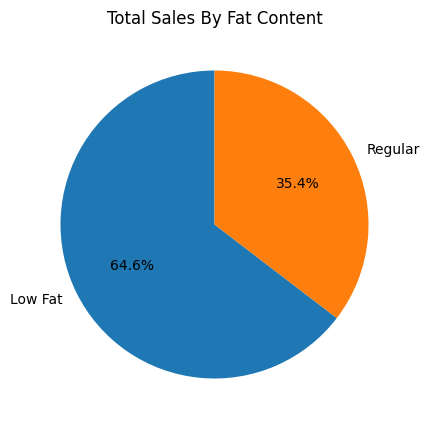

In [51]:
Sales_by_fat = df.groupby('Item Fat Content')['Total Sales'].sum()
plt.figure(figsize=(10,5))
plt.pie(Sales_by_fat, labels=Sales_by_fat.index, autopct='%1.1f%%', startangle=90)
plt.title('Total Sales By Fat Content')
plt.show()

##### **Total Sales Item Type**

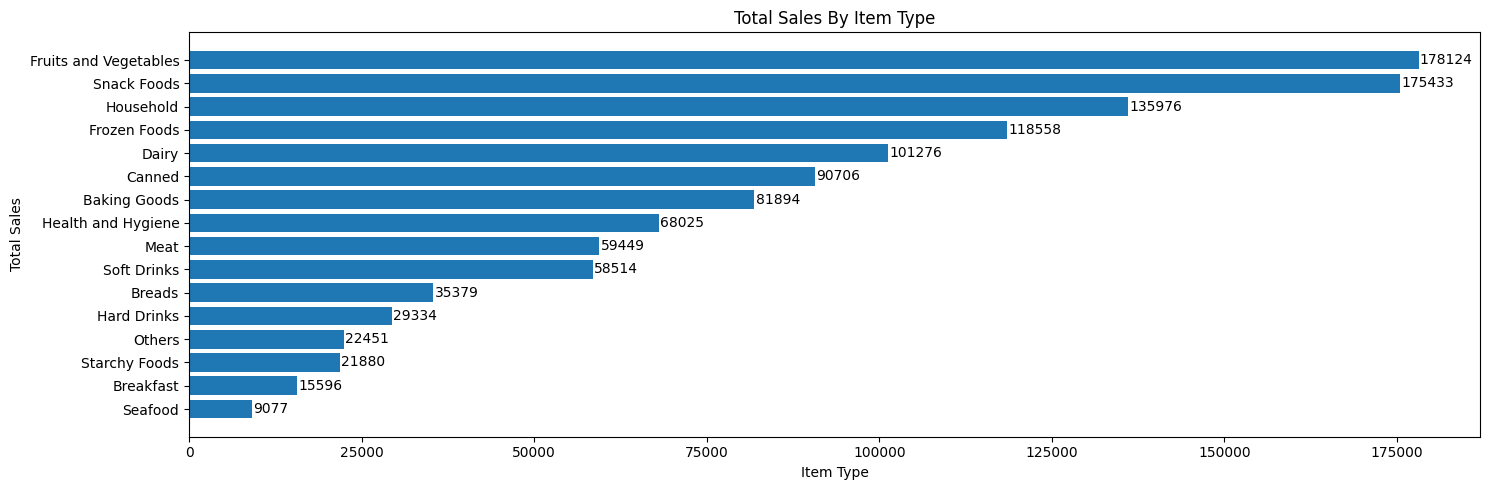

In [52]:
sales_by_items = df.groupby('Item Type')['Total Sales'].sum().sort_values(ascending=True)
plt.figure(figsize=(15,5))
bars = plt.barh(sales_by_items.index, sales_by_items.values)
for bar in bars:
    width = bar.get_width()
    plt.text(width + 200,               # x position (slightly outside bar)
             bar.get_y() + bar.get_height()/2,  # y position (middle of bar)
             f'{int(width)}',           # show value (no decimal)
             va='center')
plt.title('Total Sales By Item Type')
plt.xlabel('Item Type')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()

##### **Fat Content By Outlet For Total Sales**

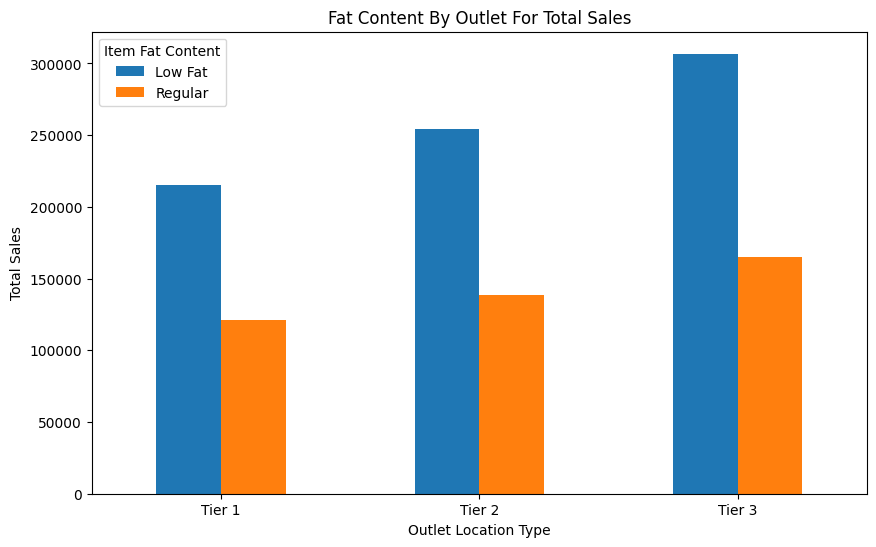

In [53]:
grouped = df.groupby(['Outlet Location Type', 'Item Fat Content'])['Total Sales'].sum().unstack()
grouped.plot(kind='bar', figsize=(10, 6))
plt.xticks(rotation=0)
plt.xlabel('Outlet Location Type')
plt.ylabel('Total Sales')
plt.title('Fat Content By Outlet For Total Sales')
plt.legend(title='Item Fat Content')
plt.show()

##### **Total Sales By Outlet Establishment**

Text(0.5, 1.0, 'Total Sales By Outlet Establishment')

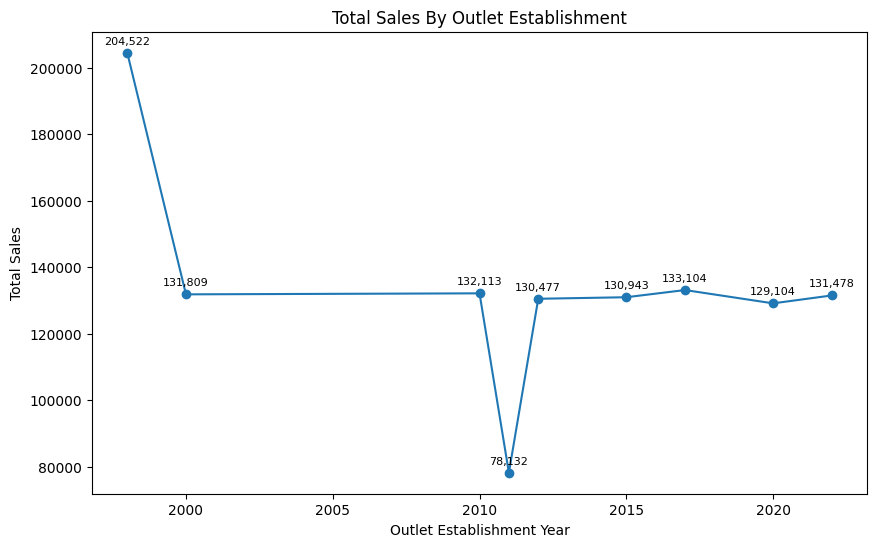

In [54]:
grouped = df.groupby(['Outlet Establishment Year'])['Total Sales'].sum()
plt.figure(figsize=(10, 6))
plt.plot(grouped.index, grouped.values, marker='o')
for x, y in zip(grouped.index, grouped.values):
    plt.text(x, y+2000, f'{y:,.0f}', ha='center', va='bottom',fontsize=8)
plt.xlabel('Outlet Establishment Year')
plt.ylabel('Total Sales')
plt.title('Total Sales By Outlet Establishment')

##### **Sales By Outlet Size**

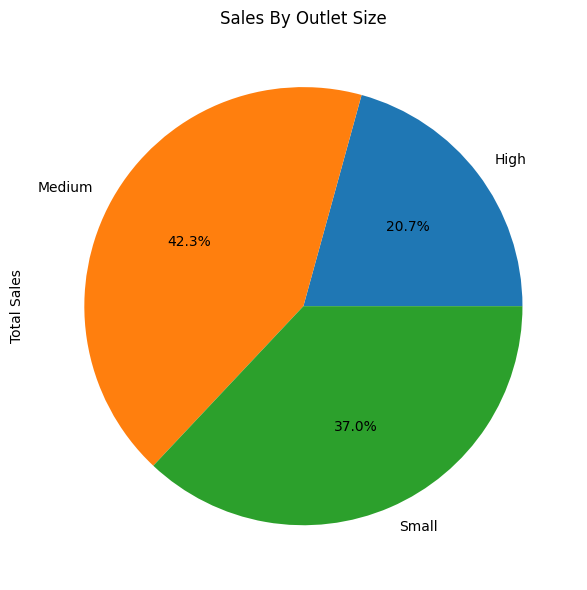

In [56]:
grouped = df.groupby(['Outlet Size'])['Total Sales'].sum()
grouped.plot(kind='pie', autopct='%1.1f%%', figsize=(6, 6))
plt.title('Sales By Outlet Size')
plt.tight_layout()
plt.show()

##### **Sales By Outlet Locaion**

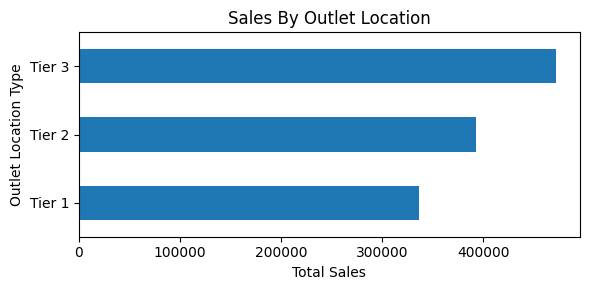

In [65]:
grouped = df.groupby(['Outlet Location Type'])['Total Sales'].sum()
grouped.plot(kind='barh', figsize=(6, 3))
plt.title('Sales By Outlet Location')
plt.ylabel('Outlet Location Type')
plt.xlabel('Total Sales')
plt.tight_layout()